In [1]:
!pip install h2o

     |████████████████████████████████| 164.6MB 90kB/s 
  Created wheel for h2o: filename=h2o-3.32.0.2-py2.py3-none-any.whl size=164620456 sha256=dec34767ce4225d57c4f1a44d40d2ee63016c46e3772f7deca8b7dd1c527293e
  Stored in directory: /root/.cache/pip/wheels/42/bd/ea/218fd15724eddf6fa7fc8fab802b6fa592e623d87199679721
Successfully built h2o


In [3]:
import h2o
import matplotlib as plt
%matplotlib inline

#importing the estimators
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator

#importing H2o grid search
import h2o.grid
from h2o.grid.grid_search import H2OGridSearch


In [4]:
import os
import h2o

startup  = '/home/h2o/bin/aquarium_startup'
shutdown = '/home/h2o/bin/aquarium_stop'

if os.path.exists(startup):
    os.system(startup)
    local_url = 'http://localhost:54321/h2o'
    aquarium = True
else:
    local_url = 'http://localhost:54321'
    aquarium = False

In [5]:
h2o.init(url=local_url)


Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.9.1" 2020-11-04; OpenJDK Runtime Environment (build 11.0.9.1+1-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.9.1+1-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpz5sj63o8
  JVM stdout: /tmp/tmpz5sj63o8/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpz5sj63o8/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.0.2
H2O_cluster_version_age:,1 month and 3 days
H2O_cluster_name:,H2O_from_python_unknownUser_t6fbj0
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [6]:
#importing the data set 
loan_level = h2o.import_file("https://s3.amazonaws.com/data.h2o.ai/DAI-Tutorials/loan_level_500k.csv")


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [7]:
loan_level.head()

CREDIT_SCORE,FIRST_PAYMENT_DATE,FIRST_TIME_HOMEBUYER_FLAG,MATURITY_DATE,METROPOLITAN_STATISTICAL_AREA,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,OCCUPANCY_STATUS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,ORIGINAL_INTEREST_RATE,CHANNEL,PREPAYMENT_PENALTY_MORTGAGE_FLAG,PRODUCT_TYPE,PROPERTY_STATE,PROPERTY_TYPE,POSTAL_CODE,LOAN_SEQUENCE_NUMBER,LOAN_PURPOSE,ORIGINAL_LOAN_TERM,NUMBER_OF_BORROWERS,SELLER_NAME,SERVICER_NAME,PREPAID,DELINQUENT
669,200206,N,202901,nan,0,1,O,80,33,162000,80,7.12,R,N,FRM,WV,SF,26100,F199Q1000004,P,320,2,Other sellers,Other servicers,TRUE,FALSE
732,199904,N,202903,17140,0,1,O,25,10,53000,25,6.5,R,N,FRM,OH,SF,45200,F199Q1000005,N,360,1,Other sellers,Other servicers,TRUE,FALSE
679,200208,N,202902,15940,30,1,O,91,48,133000,91,6.75,R,N,FRM,OH,SF,44700,F199Q1000007,P,319,1,Other sellers,Other servicers,TRUE,FALSE
721,200209,N,202902,38060,0,1,O,39,13,174000,39,6.625,T,N,FRM,AZ,SF,85200,F199Q1000013,N,318,2,Other sellers,Other servicers,TRUE,FALSE
618,200210,N,202902,10420,25,1,O,85,24,122000,85,6.375,R,N,FRM,OH,SF,44200,F199Q1000015,N,317,2,Other sellers,Other servicers,TRUE,FALSE
738,200211,N,202903,10420,0,1,O,73,44,218000,73,6,R,N,FRM,OH,SF,44300,F199Q1000016,P,317,2,Other sellers,Other servicers,TRUE,FALSE
761,200211,N,202904,nan,0,1,O,73,31,138000,73,6.375,R,N,FRM,SC,PU,29500,F199Q1000017,P,318,2,Other sellers,Other servicers,TRUE,FALSE
707,200211,N,202903,33340,0,1,O,60,57,136000,60,6.25,R,N,FRM,WI,SF,53000,F199Q1000018,C,317,2,Other sellers,Other servicers,TRUE,FALSE
760,200211,N,202903,33340,0,1,O,63,30,79000,63,6.125,R,N,FRM,WI,SF,53000,F199Q1000019,N,317,2,Other sellers,Other servicers,TRUE,FALSE
691,200302,N,202901,15940,0,1,O,65,25,130000,65,5.875,R,N,FRM,OH,SF,44700,F199Q1000023,P,312,2,Other sellers,Other servicers,TRUE,FALSE


In [9]:
loan_level.describe()

Rows:500137
Cols:27




,CREDIT_SCORE,FIRST_PAYMENT_DATE,FIRST_TIME_HOMEBUYER_FLAG,MATURITY_DATE,METROPOLITAN_STATISTICAL_AREA,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,OCCUPANCY_STATUS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,ORIGINAL_INTEREST_RATE,CHANNEL,PREPAYMENT_PENALTY_MORTGAGE_FLAG,PRODUCT_TYPE,PROPERTY_STATE,PROPERTY_TYPE,POSTAL_CODE,LOAN_SEQUENCE_NUMBER,LOAN_PURPOSE,ORIGINAL_LOAN_TERM,NUMBER_OF_BORROWERS,SELLER_NAME,SERVICER_NAME,PREPAID,DELINQUENT
type,int,int,enum,int,int,int,int,enum,int,int,int,int,real,enum,enum,enum,enum,enum,int,string,enum,int,int,enum,enum,enum,enum
mins,300.0,199901.0,,202402.0,10180.0,0.0,1.0,,6.0,1.0,8000.0,6.0,4.625,,,,,,600.0,NaN,,301.0,1.0,,,,
mean,712.5362124215468,200025.43095191979,,203023.1958723312,30777.82473929504,7.744531707523469,1.0288902574110184,,76.0535707144633,32.91754051870545,136493.48478516805,75.71071405720141,7.182686863799322,,,,,,55490.8571382869,NaN,,359.8554696013299,1.6302946648262713,,,,
maxs,839.0,201103.0,,204101.0,49740.0,55.0,4.0,,180.0,65.0,578000.0,100.0,11.5,,,,,,99900.0,NaN,,362.0,2.0,,,,
sigma,54.79126197408813,109.81554141403225,,110.38418855867243,11333.401144164478,12.04654596949256,0.21839057355939082,,15.139986048512673,11.111799994455248,60968.74306564561,14.937717088968643,0.5799408623980744,,,,,,29505.38225880303,NaN,,1.9082507104186504,0.48272535304031594,,,,
zeros,0,0,,0,0,309979,0,,0,0,0,0,0,,,,,,0,0,,0,0,,,,
missing,2711,0,0,0,70149,51048,3,0,13,14929,0,9,0,0,0,0,0,0,31,0,0,0,247,0,0,0,0
0,669.0,200206.0,N,202901.0,nan,0.0,1.0,O,80.0,33.0,162000.0,80.0,7.12,R,N,FRM,WV,SF,26100.0,F199Q1000004,P,320.0,2.0,Other sellers,Other servicers,TRUE,FALSE
1,732.0,199904.0,N,202903.0,17140.0,0.0,1.0,O,25.0,10.0,53000.0,25.0,6.5,R,N,FRM,OH,SF,45200.0,F199Q1000005,N,360.0,1.0,Other sellers,Other servicers,TRUE,FALSE
2,679.0,200208.0,N,202902.0,15940.0,30.0,1.0,O,91.0,48.0,133000.0,91.0,6.75,R,N,FRM,OH,SF,44700.0,F199Q1000007,P,319.0,1.0,Other sellers,Other servicers,TRUE,FALSE


In [10]:
loan_level["DELINQUENT"].table()


DELINQUENT,Count
FALSE,482146
TRUE,17991


In [11]:
  train, valid, test = loan_level.split_frame([0.7, 0.15], seed=42)


In [12]:
print("train:%d valid:%d test:%d" % (train.nrows, valid.nrows, test.nrows))


train:350268 valid:74971 test:74898


In [13]:
y = "DELINQUENT"
ignore = ["DELINQUENT", "PREPAID", "PREPAYMENT_PENALTY_MORTGAGE_FLAG", "PRODUCT_TYPE"]
x = list(set(train.names) - set(ignore))

In [14]:
print(x)

['ORIGINAL_LOAN_TO_VALUE', 'NUMBER_OF_BORROWERS', 'ORIGINAL_COMBINED_LOAN_TO_VALUE', 'CHANNEL', 'POSTAL_CODE', 'PROPERTY_TYPE', 'FIRST_PAYMENT_DATE', 'ORIGINAL_LOAN_TERM', 'FIRST_TIME_HOMEBUYER_FLAG', 'ORIGINAL_UPB', 'MATURITY_DATE', 'SELLER_NAME', 'ORIGINAL_DEBT_TO_INCOME_RATIO', 'LOAN_PURPOSE', 'PROPERTY_STATE', 'LOAN_SEQUENCE_NUMBER', 'OCCUPANCY_STATUS', 'SERVICER_NAME', 'CREDIT_SCORE', 'NUMBER_OF_UNITS', 'ORIGINAL_INTEREST_RATE', 'MORTGAGE_INSURANCE_PERCENTAGE', 'METROPOLITAN_STATISTICAL_AREA']


Now that we have our train, valid, and test sets, as well as our x and y variables defined, we can start building models! We will start with an H2O Generalized Linear Model (GLM). A GLM fits a generalized linear model, specified by a response variable, a set of predictors, and a description of the error distribution. Since we have a binomial classification problem, we have to specify the family, in this case, it will be binomial.

Since we already imported the H2O GLM estimator, we will just instantiate our model. For simplicity, the name of our model will be glm. To build a GLM, you just need to define the family, and you are ready to go. However, we will set a random seed for reproducibility purposes, and also a model id to be able to retrieve the model later on if we need to access it. You can instantiate your GLM, as shown below.

In [15]:
glm = H2OGeneralizedLinearEstimator(family = "binomial", seed = 42, model_id = 'default_glm')

In [16]:
%time glm.train(x=x,y=y,training_frame= train,validation_frame=valid)

/usr/local/lib/python3.6/dist-packages/h2o/estimators/estimator_base.py:200: RuntimeWarning: Dropping bad and constant columns: [LOAN_SEQUENCE_NUMBER]
  warnings.warn(mesg["message"], RuntimeWarning)


glm Model Build progress: |███████████████████████████████████████████████| 100%
CPU times: user 111 ms, sys: 8.31 ms, total: 119 ms
Wall time: 5.92 s


In [17]:
glm

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  default_glm


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,"Elastic Net (alpha = 0.5, lambda = 6.626E-5 )",161,88,7,py_4_sid_a7e7




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.031421719571328846
RMSE: 0.1772617261885059
LogLoss: 0.12328049878526559
Null degrees of freedom: 350267
Residual degrees of freedom: 350179
Null deviance: 108932.13150369536
Residual deviance: 86362.4274970348
AIC: 86540.4274970348
AUC: 0.8503523971011903
AUCPR: 0.206633488178161
Gini: 0.7007047942023805

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1282670025027246: 


,,FALSE,TRUE,Error,Rate
0,FALSE,321986.0,15621.0,0.0463,(15621.0/337607.0)
1,TRUE,7882.0,4779.0,0.6225,(7882.0/12661.0)
2,Total,329868.0,20400.0,0.0671,(23503.0/350268.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.128267,0.289102,207.0
1,max f2,0.066290,0.386470,266.0
2,max f0point5,0.216327,0.287980,151.0
3,max accuracy,0.975876,0.963851,0.0
4,max precision,0.554784,0.402597,44.0
5,max recall,0.000572,1.000000,399.0
6,max specificity,0.975876,0.999997,0.0
7,max absolute_mcc,0.108905,0.267492,222.0
8,max min_per_class_accuracy,0.039056,0.771557,307.0
9,max mean_per_class_accuracy,0.034489,0.774192,315.0



Gains/Lift Table: Avg response rate:  3.61 %, avg score:  3.61 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010001,0.315606,10.503740,10.503740,0.379675,0.447135,0.379675,0.447135,0.105047,0.105047,950.373986,950.373986,0.098611
1,2,0.020002,0.231615,7.763290,9.133515,0.280617,0.268426,0.330146,0.357781,0.077640,0.182687,676.329044,813.351515,0.168786
2,3,0.030003,0.189186,6.175883,8.147638,0.223237,0.209056,0.294509,0.308206,0.061764,0.244451,517.588314,714.763781,0.222491
3,4,0.040001,0.160763,5.340267,7.445946,0.193033,0.174289,0.269146,0.274734,0.053392,0.297844,434.026745,644.594550,0.267513
4,5,0.050002,0.140680,4.470013,6.850725,0.161576,0.150204,0.247630,0.249826,0.044704,0.342548,347.001260,585.072494,0.303517
5,6,0.100001,0.087297,3.363160,5.106992,0.121567,0.109556,0.184600,0.179693,0.168154,0.510702,236.316030,410.699240,0.426104
6,7,0.150002,0.062777,2.337808,4.183913,0.084504,0.073795,0.151234,0.144393,0.116894,0.627597,133.780791,318.391334,0.495505
7,8,0.200001,0.048144,1.679211,3.557756,0.060698,0.054923,0.128601,0.122026,0.083959,0.711555,67.921061,255.775553,0.530738
8,9,0.300002,0.031478,1.149192,2.754901,0.041539,0.038923,0.099580,0.094325,0.114920,0.826475,14.919176,175.490094,0.546217
9,10,0.399999,0.021718,0.625557,2.222576,0.022612,0.026218,0.080339,0.077298,0.062554,0.889029,-37.444271,122.257643,0.507370




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.03107511759141766
RMSE: 0.17628135917168797
LogLoss: 0.12274529844188314
Null degrees of freedom: 74970
Residual degrees of freedom: 74882
Null deviance: 22974.597464485523
Residual deviance: 18404.67553897284
AIC: 18582.67553897284
AUC: 0.8450464412102321
AUCPR: 0.19801886666651378
Gini: 0.6900928824204642

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.12627867037192236: 


,,FALSE,TRUE,Error,Rate
0,FALSE,68868.0,3445.0,0.0476,(3445.0/72313.0)
1,TRUE,1649.0,1009.0,0.6204,(1649.0/2658.0)
2,Total,70517.0,4454.0,0.0679,(5094.0/74971.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.126279,0.283746,201.0
1,max f2,0.062995,0.373455,264.0
2,max f0point5,0.229837,0.290515,135.0
3,max accuracy,0.964445,0.964533,0.0
4,max precision,0.395160,0.398104,76.0
5,max recall,0.000762,1.000000,398.0
6,max specificity,0.964445,0.999986,0.0
7,max absolute_mcc,0.123640,0.260018,204.0
8,max min_per_class_accuracy,0.038583,0.766742,300.0
9,max mean_per_class_accuracy,0.032769,0.767428,311.0



Gains/Lift Table: Avg response rate:  3.55 %, avg score:  3.62 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010004,0.317794,10.417340,10.417340,0.369333,0.455618,0.369333,0.455618,0.104214,0.104214,941.733985,941.733985,0.097673
1,2,0.020008,0.234316,8.273700,9.345520,0.293333,0.270835,0.331333,0.363227,0.082769,0.186983,727.369952,834.551969,0.173112
2,3,0.030012,0.187723,6.430921,8.373987,0.228000,0.208398,0.296889,0.311617,0.064334,0.251317,543.092099,737.398679,0.229440
3,4,0.040002,0.159223,4.481294,7.401787,0.158879,0.172164,0.262421,0.276789,0.044771,0.296087,348.129435,640.178718,0.265498
4,5,0.050006,0.139193,4.287281,6.778720,0.152000,0.149074,0.240331,0.251239,0.042889,0.338977,328.728066,577.871972,0.299592
5,6,0.100012,0.087251,3.197509,4.988115,0.113364,0.109587,0.176847,0.180413,0.159895,0.498871,219.750930,398.811451,0.413520
6,7,0.150005,0.062508,2.325398,4.100700,0.082444,0.073822,0.145385,0.144889,0.116253,0.615124,132.539762,310.070006,0.482216
7,8,0.200011,0.048269,1.722893,3.506209,0.061083,0.054932,0.124308,0.122398,0.086155,0.701279,72.289325,250.620872,0.519694
8,9,0.300009,0.031184,1.124921,2.712481,0.039883,0.038895,0.096168,0.094565,0.112491,0.813770,12.492095,171.248142,0.532645
9,10,0.400008,0.021592,0.665923,2.200859,0.023609,0.026053,0.078029,0.077438,0.066591,0.880361,-33.407690,120.085890,0.498009




Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-12-21 15:52:21,0.000 sec,0,54466.065752,0.155498,,,,,,,,,,,,,,
1,,2020-12-21 15:52:22,0.979 sec,1,50061.613368,0.144447,,,,,,,,,,,,,,
2,,2020-12-21 15:52:22,1.314 sec,2,43570.207802,0.125483,,,,,,,,,,,,,,
3,,2020-12-21 15:52:23,1.619 sec,3,43215.311321,0.124491,,,,,,,,,,,,,,
4,,2020-12-21 15:52:23,1.915 sec,4,43195.943426,0.124463,,,,,,,,,,,,,,
5,,2020-12-21 15:52:23,2.205 sec,5,43195.779638,0.124463,,,,,,,,,,,,,,
6,,2020-12-21 15:52:24,2.848 sec,6,43182.000891,0.124441,,,,,,,,,,,,,,
7,,2020-12-21 15:52:24,3.147 sec,7,43181.213749,0.124441,0.177262,0.12328,0.0981145,NaN,NaN,10.5037,0.0671,0.176281,0.122745,0.0912843,0.845046,0.198019,10.4173,0.0679463



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,"SERVICER_NAME.WELLSFARGOBANK,NA",1.525186,1.000000,0.055449
1,"SERVICER_NAME.JPMORGANCHASEBANK,NA",1.310670,0.859351,0.047651
2,"SERVICER_NAME.CITIMORTGAGE,INC",1.147234,0.752193,0.041709
3,SERVICER_NAME.CHASEHOMEFINANCELLC,0.789225,0.517462,0.028693
4,PROPERTY_STATE.CA,0.722806,0.473913,0.026278
5,SERVICER_NAME.Other servicers,0.710362,0.465754,0.025826
6,CREDIT_SCORE,0.673536,0.441609,0.024487
7,SELLER_NAME.BISHOPSGATERESIDENTI,0.651131,0.426919,0.023672
8,SERVICER_NAME.NATLCITYMTGECO,0.597233,0.391581,0.021713
9,"SELLER_NAME.FIRSTARBANK,NA",0.581422,0.381214,0.021138



See the whole table with table.as_data_frame()


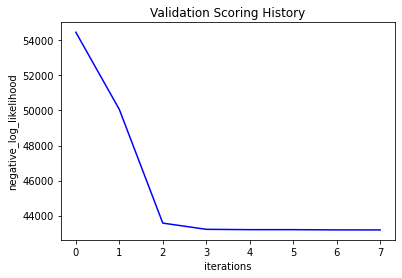

In [18]:
glm.plot(metric='negative_log_likelihood')


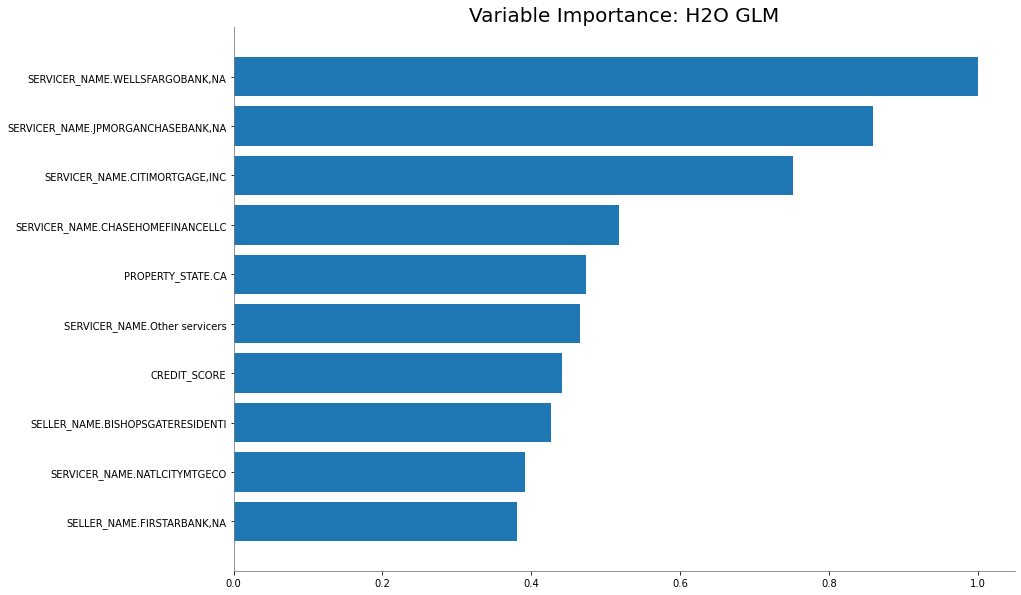

In [19]:
glm.varimp_plot()


In [20]:
glm.accuracy()


[[0.9758761624564709, 0.9638505373028652]]

In [21]:
glm.accuracy(thresholds=0.9757992545882868)


Could not find exact threshold 0.9757992545882868; using closest threshold found 0.9758761624564709.


[[0.9757992545882868, 0.9638505373028652]]

In [22]:
glm.predict(valid).head(10)


glm prediction progress: |████████████████████████████████████████████████| 100%


predict,FALSE,TRUE
FALSE,0.994227,0.00577262
FALSE,0.997196,0.00280374
FALSE,0.964314,0.0356865
FALSE,0.996098,0.0039019
FALSE,0.996148,0.00385171
TRUE,0.646653,0.353347
FALSE,0.994166,0.00583412
FALSE,0.995727,0.00427344
FALSE,0.958063,0.0419368
FALSE,0.994599,0.005401


In [23]:
default_glm_perf=glm.model_performance(valid)


In [24]:
print(default_glm_perf.auc())

0.8450464412102321


In [25]:
# lets built the Defult random forest classifier 
rf = H2ORandomForestEstimator(seed = 42,model_id='defult_rf')
%time rf.train(x=x,y=y,training_frame = train,validation_frame=valid)

/usr/local/lib/python3.6/dist-packages/h2o/estimators/estimator_base.py:200: RuntimeWarning: Dropping bad and constant columns: [LOAN_SEQUENCE_NUMBER]
  warnings.warn(mesg["message"], RuntimeWarning)


drf Model Build progress: |███████████████████████████████████████████████| 100%
CPU times: user 527 ms, sys: 57.3 ms, total: 584 ms
Wall time: 1min 1s


In [26]:
rf

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  defult_rf


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,7598178.0,20.0,20.0,20.0,9881.0,11724.0,10834.34




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.03217049865504154
RMSE: 0.1793613633284536
LogLoss: 0.18808040483623167
Mean Per-Class Error: 0.26910942081145595
AUC: 0.8034365546707388
AUCPR: 0.19880274803695155
Gini: 0.6068731093414776

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1714152473716729: 


,,FALSE,TRUE,Error,Rate
0,FALSE,322404.0,15203.0,0.045,(15203.0/337607.0)
1,TRUE,8458.0,4203.0,0.668,(8458.0/12661.0)
2,Total,330862.0,19406.0,0.0676,(23661.0/350268.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.171415,0.262139,194.0
1,max f2,0.088095,0.345659,266.0
2,max f0point5,0.291459,0.272684,125.0
3,max accuracy,0.570928,0.964273,43.0
4,max precision,0.998148,1.000000,0.0
5,max recall,0.000007,1.000000,399.0
6,max specificity,0.998148,1.000000,0.0
7,max absolute_mcc,0.151393,0.234703,209.0
8,max min_per_class_accuracy,0.037451,0.727541,330.0
9,max mean_per_class_accuracy,0.013768,0.730891,360.0



Gains/Lift Table: Avg response rate:  3.61 %, avg score:  3.75 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010001,0.355807,10.811744,10.811744,0.390808,0.468185,0.390808,0.468185,0.108127,0.108127,981.174427,981.174427,0.101806
1,2,0.020002,0.276656,6.547068,8.679406,0.236654,0.311273,0.313731,0.389729,0.065477,0.173604,554.706793,767.940610,0.159363
2,3,0.030003,0.232143,5.172894,7.510569,0.186983,0.252600,0.271482,0.344019,0.051734,0.225338,417.289444,651.056888,0.202660
3,4,0.040001,0.202677,4.408091,6.735115,0.159338,0.217047,0.243452,0.312283,0.044072,0.269410,340.809059,573.511538,0.238013
4,5,0.050002,0.180995,4.011955,6.190452,0.145019,0.191749,0.223764,0.288175,0.040123,0.309533,301.195477,519.045216,0.269264
5,6,0.100218,0.117647,2.944402,4.563960,0.106430,0.144611,0.164972,0.216240,0.147856,0.457389,194.440231,356.395953,0.370566
6,7,0.150002,0.081530,2.086227,3.741617,0.075410,0.098156,0.135247,0.177049,0.103862,0.561251,108.622686,274.161694,0.426672
7,8,0.202559,0.062500,1.498295,3.159555,0.054158,0.070321,0.114207,0.149357,0.078746,0.639997,49.829529,215.955480,0.453843
8,9,0.300002,0.030525,1.059398,2.477410,0.038294,0.049436,0.089550,0.116902,0.103230,0.743227,5.939771,147.740996,0.459847
9,10,0.399999,0.008321,0.906742,2.084751,0.032776,0.016276,0.075357,0.091746,0.090672,0.833899,-9.325786,108.475142,0.450172




ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.03071157490750522
RMSE: 0.17524718230974562
LogLoss: 0.13267563440956423
Mean Per-Class Error: 0.24861547353029934
AUC: 0.826378639356413
AUCPR: 0.2236693606654231
Gini: 0.652757278712826

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1855035085498162: 


,,FALSE,TRUE,Error,Rate
0,FALSE,70080.0,2233.0,0.0309,(2233.0/72313.0)
1,TRUE,1851.0,807.0,0.6964,(1851.0/2658.0)
2,Total,71931.0,3040.0,0.0545,(4084.0/74971.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.185504,0.283257,164.0
1,max f2,0.092517,0.365133,245.0
2,max f0point5,0.288050,0.307828,107.0
3,max accuracy,0.507947,0.965133,43.0
4,max precision,0.996667,1.000000,0.0
5,max recall,0.000013,1.000000,399.0
6,max specificity,0.996667,1.000000,0.0
7,max absolute_mcc,0.185504,0.255698,164.0
8,max min_per_class_accuracy,0.041619,0.747931,312.0
9,max mean_per_class_accuracy,0.043816,0.751385,308.0



Gains/Lift Table: Avg response rate:  3.55 %, avg score:  3.75 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010004,0.325072,12.372942,12.372942,0.438667,0.439038,0.438667,0.439038,0.123777,0.123777,1137.294156,1137.294156,0.117955
1,2,0.020008,0.248567,7.070252,9.721597,0.250667,0.282077,0.344667,0.360557,0.070730,0.194507,607.025232,872.159694,0.180913
2,3,0.030012,0.210902,5.716374,8.386523,0.202667,0.228056,0.297333,0.316390,0.057186,0.251693,471.637422,738.652270,0.229830
3,4,0.040002,0.185958,4.933190,7.524053,0.174900,0.197849,0.266756,0.286785,0.049285,0.300978,393.318958,652.405304,0.270569
4,5,0.050006,0.166226,3.723165,6.763673,0.132000,0.175703,0.239797,0.264562,0.037246,0.338224,272.316479,576.367262,0.298812
5,6,0.100012,0.107784,3.069609,4.916641,0.108829,0.133063,0.174313,0.198813,0.153499,0.491723,206.960893,391.664078,0.406109
6,7,0.150005,0.077850,2.016850,3.950216,0.071505,0.091579,0.140050,0.163074,0.100828,0.592551,101.684972,295.021566,0.458813
7,8,0.200011,0.059189,1.497187,3.336918,0.053081,0.066814,0.118306,0.139008,0.074868,0.667419,49.718671,233.691752,0.484589
8,9,0.300009,0.033730,1.087298,2.587078,0.038549,0.044971,0.091722,0.107663,0.108728,0.776147,8.729817,158.707775,0.493639
9,10,0.400008,0.021259,0.714833,2.119032,0.025343,0.025871,0.075128,0.087216,0.071482,0.847630,-28.516729,111.903210,0.464075




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-12-21 16:00:35,0.059 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-12-21 16:00:37,2.482 sec,1.0,0.238486,1.772648,0.579630,0.068566,4.199508,0.074234,0.235348,1.725575,0.585285,0.071755,4.582604,0.070080
2,,2020-12-21 16:00:42,7.702 sec,5.0,0.215222,1.074432,0.622662,0.086922,5.021408,0.087262,0.187744,0.433595,0.718994,0.145652,9.138677,0.060063
3,,2020-12-21 16:00:57,22.628 sec,17.0,0.188311,0.416351,0.729076,0.142141,8.496752,0.072041,0.178403,0.195225,0.794089,0.193561,10.966929,0.062504
4,,2020-12-21 16:01:14,39.818 sec,35.0,0.181230,0.236632,0.783578,0.184163,10.416867,0.070720,0.175985,0.144539,0.817364,0.215977,12.034472,0.056622
5,,2020-12-21 16:01:33,58.522 sec,50.0,0.179361,0.188080,0.803437,0.198803,10.811744,0.067551,0.175247,0.132676,0.826379,0.223669,12.372942,0.054474



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,PROPERTY_STATE,42236.546875,1.000000,0.134475
1,CREDIT_SCORE,38299.613281,0.906788,0.121940
2,SELLER_NAME,31417.185547,0.743839,0.100028
3,SERVICER_NAME,25920.623047,0.613701,0.082527
4,ORIGINAL_DEBT_TO_INCOME_RATIO,23534.988281,0.557219,0.074932
5,ORIGINAL_UPB,23414.837891,0.554374,0.074549
6,METROPOLITAN_STATISTICAL_AREA,20642.494141,0.488735,0.065723
7,ORIGINAL_INTEREST_RATE,20437.968750,0.483893,0.065071
8,ORIGINAL_LOAN_TO_VALUE,13487.042969,0.319322,0.042941
9,POSTAL_CODE,12512.929688,0.296258,0.039839



See the whole table with table.as_data_frame()


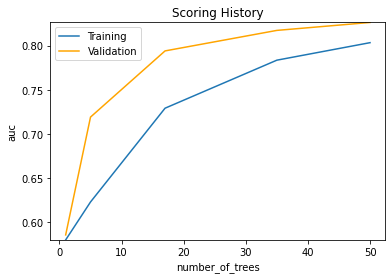

In [27]:
rf.plot(metric='auc')

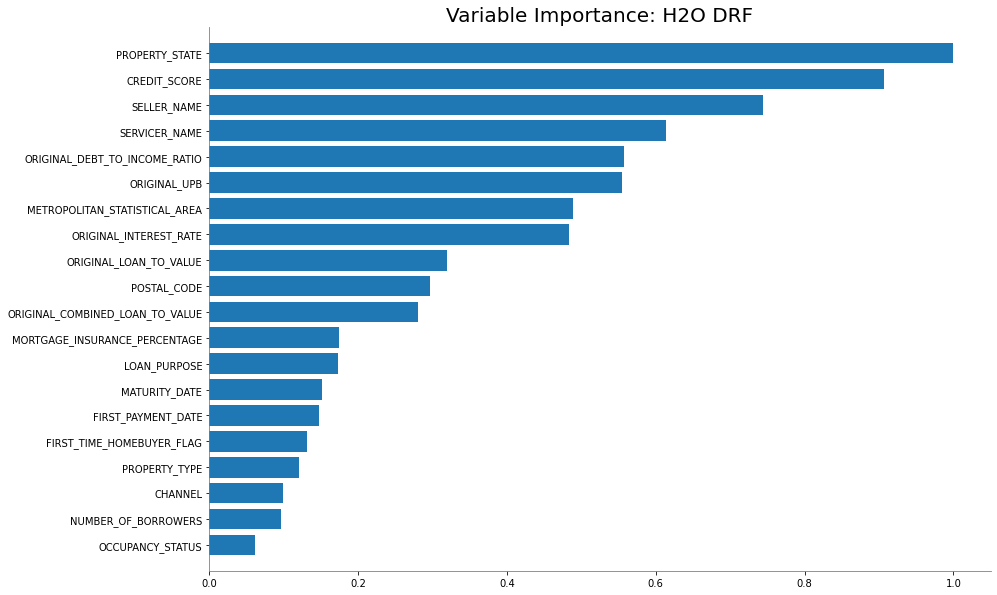

In [28]:
rf.varimp_plot(20)


In [29]:
rf.accuracy()

[[0.5709275782581964, 0.9642730709057065]]

In [31]:
rf.F1()

[[0.1714152473716729, 0.2621386472074095]]

In [32]:
rf.predict(valid)


drf prediction progress: |████████████████████████████████████████████████| 100%


predict,FALSE,TRUE
FALSE,0.89606,0.10394
FALSE,0.989924,0.0100759
FALSE,0.99179,0.00820961
FALSE,0.994186,0.005814
FALSE,0.999108,0.00089201
TRUE,0.726028,0.273972
FALSE,0.999971,2.88916e-05
FALSE,0.999835,0.000164608
FALSE,0.847452,0.152548
FALSE,1,0


In [33]:
default_rf_per = rf.model_performance(valid)

In [34]:
# building a GBM model
gbm = H2OGradientBoostingEstimator(seed = 42,model_id = 'defult_gbm')
%time gbm.train(x=x,y=y,training_frame=train, validation_frame = valid)

/usr/local/lib/python3.6/dist-packages/h2o/estimators/estimator_base.py:200: RuntimeWarning: Dropping bad and constant columns: [LOAN_SEQUENCE_NUMBER]
  warnings.warn(mesg["message"], RuntimeWarning)


gbm Model Build progress: |███████████████████████████████████████████████| 100%
CPU times: user 336 ms, sys: 31.6 ms, total: 368 ms
Wall time: 32.9 s


In [35]:
gbm

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  defult_gbm


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,28336.0,5.0,5.0,5.0,25.0,32.0,30.96




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.029506421363469686
RMSE: 0.17177433266780484
LogLoss: 0.11505127038888421
Mean Per-Class Error: 0.20226265196401738
AUC: 0.8781516490712882
AUCPR: 0.29501524692178666
Gini: 0.7563032981425764

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.15429695309862027: 


,,FALSE,TRUE,Error,Rate
0,FALSE,326552.0,11055.0,0.0327,(11055.0/337607.0)
1,TRUE,7745.0,4916.0,0.6117,(7745.0/12661.0)
2,Total,334297.0,15971.0,0.0537,(18800.0/350268.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.154297,0.343392,194.0
1,max f2,0.071922,0.428489,265.0
2,max f0point5,0.269743,0.364851,133.0
3,max accuracy,0.451590,0.965027,71.0
4,max precision,0.896728,1.000000,0.0
5,max recall,0.003220,1.000000,398.0
6,max specificity,0.896728,1.000000,0.0
7,max absolute_mcc,0.141960,0.318392,203.0
8,max min_per_class_accuracy,0.039489,0.796986,309.0
9,max mean_per_class_accuracy,0.037540,0.797737,312.0



Gains/Lift Table: Avg response rate:  3.61 %, avg score:  3.62 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010001,0.345972,14.286666,14.286666,0.516415,0.479898,0.516415,0.479898,0.142880,0.142880,1328.666572,1328.666572,0.137862
1,2,0.020002,0.247640,9.011103,11.648884,0.325721,0.290490,0.421068,0.385194,0.090119,0.232999,801.110315,1064.888444,0.220985
2,3,0.030003,0.197997,7.139384,10.145718,0.258065,0.220582,0.366733,0.330323,0.071400,0.304399,613.938409,914.571765,0.284687
3,4,0.040001,0.166786,5.482464,8.980154,0.198172,0.181255,0.324602,0.293064,0.054814,0.359213,448.246392,798.015384,0.331184
4,5,0.050002,0.144748,4.880685,8.160213,0.176420,0.155075,0.294964,0.265465,0.048811,0.408025,388.068514,716.021329,0.371450
5,6,0.100001,0.085874,3.405812,5.783080,0.123109,0.110567,0.209039,0.188018,0.170287,0.578311,240.581193,478.308048,0.496248
6,7,0.150002,0.059880,2.250930,4.605675,0.081363,0.071572,0.166480,0.149202,0.112550,0.690862,125.092991,360.567455,0.561143
7,8,0.200001,0.044609,1.525981,3.835773,0.055159,0.051662,0.138650,0.124817,0.076297,0.767159,52.598067,283.577306,0.588428
8,9,0.300002,0.027793,0.992017,2.887854,0.035858,0.035153,0.104386,0.094929,0.099202,0.866361,-0.798292,188.785440,0.587599
9,10,0.399999,0.019080,0.537884,2.300375,0.019443,0.023012,0.083151,0.076950,0.053787,0.920148,-46.211551,130.037450,0.539656




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.03014535673578486
RMSE: 0.1736241824625385
LogLoss: 0.11952062413571657
Mean Per-Class Error: 0.22386818861825042
AUC: 0.8541002080486222
AUCPR: 0.23773886113273363
Gini: 0.7082004160972444

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.16566772863569384: 


,,FALSE,TRUE,Error,Rate
0,FALSE,70192.0,2121.0,0.0293,(2121.0/72313.0)
1,TRUE,1817.0,841.0,0.6836,(1817.0/2658.0)
2,Total,72009.0,2962.0,0.0525,(3938.0/74971.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.165668,0.299288,177.0
1,max f2,0.070046,0.392894,261.0
2,max f0point5,0.257240,0.321033,127.0
3,max accuracy,0.592026,0.964946,30.0
4,max precision,0.895425,1.000000,0.0
5,max recall,0.003543,1.000000,397.0
6,max specificity,0.895425,1.000000,0.0
7,max absolute_mcc,0.100112,0.280014,230.0
8,max min_per_class_accuracy,0.035786,0.773514,311.0
9,max mean_per_class_accuracy,0.031330,0.776132,319.0



Gains/Lift Table: Avg response rate:  3.55 %, avg score:  3.60 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010004,0.344236,13.012273,13.012273,0.461333,0.473428,0.461333,0.473428,0.130173,0.130173,1201.227289,1201.227289,0.124586
1,2,0.020008,0.243068,7.784799,10.398536,0.276000,0.287629,0.368667,0.380528,0.077878,0.208051,678.479910,939.853599,0.194955
2,3,0.030012,0.195026,6.054844,8.950639,0.214667,0.217315,0.317333,0.326124,0.060572,0.268623,505.484374,795.063858,0.247382
3,4,0.040002,0.163482,4.933190,7.947281,0.174900,0.178416,0.281761,0.289234,0.049285,0.317908,393.318958,694.728102,0.288121
4,5,0.050006,0.141967,3.723165,7.102232,0.132000,0.152511,0.251800,0.261882,0.037246,0.355154,272.316479,610.223243,0.316365
5,6,0.100012,0.085865,3.468357,5.285295,0.122966,0.109552,0.187383,0.185717,0.173439,0.528593,246.835715,428.529479,0.444334
6,7,0.150005,0.060279,2.197463,4.256201,0.077908,0.071692,0.150898,0.147716,0.109857,0.638450,119.746313,325.620062,0.506399
7,8,0.200011,0.044445,1.617564,3.596497,0.057349,0.051758,0.127509,0.123725,0.080888,0.719338,61.756353,259.649735,0.538416
8,9,0.300009,0.027777,1.068487,2.753865,0.037882,0.035185,0.097635,0.094213,0.106847,0.826185,6.848679,175.386463,0.545516
9,10,0.400008,0.019122,0.639587,2.225313,0.022676,0.023018,0.078896,0.076415,0.063958,0.890143,-36.041284,122.531289,0.508151




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-12-21 16:06:50,0.055 sec,0.0,0.186655,0.155498,0.500000,0.036147,1.000000,0.963853,0.184925,0.153223,0.500000,0.035454,1.000000,0.964546
1,,2020-12-21 16:06:52,1.603 sec,1.0,0.184765,0.147793,0.813317,0.179129,8.555719,0.075742,0.183099,0.145890,0.802085,0.169243,8.720747,0.056662
2,,2020-12-21 16:06:53,2.585 sec,2.0,0.183459,0.143542,0.826473,0.187720,8.791581,0.075742,0.181892,0.142011,0.812856,0.173714,8.818929,0.071134
3,,2020-12-21 16:06:54,3.461 sec,3.0,0.182341,0.140210,0.835081,0.198596,10.487783,0.057722,0.180861,0.138954,0.821264,0.183773,10.026278,0.060690
4,,2020-12-21 16:06:58,7.912 sec,10.0,0.177741,0.128381,0.850019,0.229720,11.814733,0.062010,0.176867,0.128484,0.835039,0.207787,11.583179,0.071134
5,,2020-12-21 16:07:04,14.242 sec,20.0,0.175113,0.121953,0.860977,0.251370,12.722951,0.061302,0.175041,0.123484,0.842853,0.220441,11.733610,0.068213
6,,2020-12-21 16:07:10,19.533 sec,29.0,0.173801,0.118936,0.868546,0.266921,13.181009,0.057507,0.174370,0.121467,0.848522,0.227861,11.959257,0.058796
7,,2020-12-21 16:07:15,24.883 sec,38.0,0.172785,0.116893,0.873821,0.280680,13.599579,0.058335,0.173955,0.120370,0.851675,0.233136,12.673803,0.056942
8,,2020-12-21 16:07:20,29.591 sec,46.0,0.172098,0.115601,0.876922,0.290097,14.026047,0.051618,0.173734,0.119757,0.853603,0.236249,12.749019,0.053781
9,,2020-12-21 16:07:22,32.201 sec,50.0,0.171774,0.115051,0.878152,0.295015,14.286666,0.053673,0.173624,0.119521,0.854100,0.237739,13.012273,0.052527



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,CREDIT_SCORE,2309.658691,1.000000,0.294923
1,SERVICER_NAME,1683.956299,0.729093,0.215026
2,PROPERTY_STATE,1255.222290,0.543467,0.160281
3,SELLER_NAME,997.285217,0.431789,0.127345
4,NUMBER_OF_BORROWERS,316.293396,0.136944,0.040388
5,ORIGINAL_INTEREST_RATE,300.391693,0.130059,0.038357
6,ORIGINAL_UPB,292.308807,0.126559,0.037325
7,MORTGAGE_INSURANCE_PERCENTAGE,186.016342,0.080538,0.023753
8,ORIGINAL_LOAN_TO_VALUE,158.307068,0.068541,0.020214
9,PROPERTY_TYPE,64.317169,0.027847,0.008213



See the whole table with table.as_data_frame()


In [36]:
gbm.predict(valid)


gbm prediction progress: |████████████████████████████████████████████████| 100%


predict,FALSE,TRUE
FALSE,0.978372,0.0216281
FALSE,0.995024,0.00497636
FALSE,0.964645,0.0353549
FALSE,0.99305,0.00694996
FALSE,0.99217,0.0078297
TRUE,0.591272,0.408728
FALSE,0.993899,0.00610064
FALSE,0.995599,0.00440117
FALSE,0.950489,0.0495107
FALSE,0.992925,0.00707464


In [37]:
default_gbm_per = gbm.model_performance(valid)


In [38]:
#Tune the GLM with H2O GridSearch

In [40]:
glm_grid = h2o.grid.H2OGridSearch (
    H2OGeneralizedLinearEstimator( 
        family = "binomial",
        lambda_search = True),
    
    hyper_params = {
        "alpha": [x*0.01 for x in range(0, 100)],
        "missing_values_handling" : ["Skip", "MeanImputation"],
        },
    
    grid_id = "glm_random_grid",
    
    search_criteria = {
        "strategy":"RandomDiscrete",
        "max_models":300,
        "max_runtime_secs":300,
        "seed":42
        }
)

%time glm_grid.train(x=x, y=y, training_frame=train, validation_frame = valid)

glm Grid Build progress: |████████████████████████████████████████████████| 100%
CPU times: user 1.4 s, sys: 142 ms, total: 1.54 s
Wall time: 5min 1s


In [41]:
sorted_glm_grid = glm_grid.get_grid(sort_by='auc',decreasing=True)
sorted_glm_grid.sorted_metric_table()

,,alpha,missing_values_handling,model_ids,auc
0,,[0.32],Skip,glm_random_grid_model_6,0.8534439913267556
1,,[0.44],Skip,glm_random_grid_model_3,0.8533995870569479
2,,[0.33],Skip,glm_random_grid_model_2,0.8533701061733173
3,,[0.12],Skip,glm_random_grid_model_1,0.8533524253745624
4,,[0.93],MeanImputation,glm_random_grid_model_4,0.8460909739458545
5,,[0.92],MeanImputation,glm_random_grid_model_5,0.8460514282358992
6,,[0.11],MeanImputation,glm_random_grid_model_7,0.8454739547355049


In [42]:
tuned_glm = sorted_glm_grid.models[0]
tuned_glm.summary()


GLM Model: summary


,,family,link,regularization,lambda_search,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,"Elastic Net (alpha = 0.32, lambda = 1.25E-5 )","nlambda = 100, lambda.max = 0.1038, lambda.min = 1.25E-5, lambda.1...",161,147,146,py_4_sid_a7e7


In [43]:
tuned_glm_perf = tuned_glm.model_performance(valid)


In [44]:
print("Default GLM AUC: %.4f \nTuned GLM AUC:%.4f" % (default_glm_perf.auc(), tuned_glm_perf.auc()))


Default GLM AUC: 0.8450 
Tuned GLM AUC:0.8534


In [45]:
print ("Default GLM F1 Score:", default_glm_perf.F1())
print ("Tuned GLM F1 Score", tuned_glm_perf.F1())

Default GLM F1 Score: [[0.12627867037192236, 0.28374578177727783]]
Tuned GLM F1 Score [[0.12602626371670034, 0.28173258003766477]]


In [46]:
print ("Default GLM: ", default_glm_perf.confusion_matrix())
print ("Tuned GLM: ",  tuned_glm_perf.confusion_matrix())

Default GLM:  
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.12627867037192236: 


,,FALSE,TRUE,Error,Rate
0,FALSE,68868.0,3445.0,0.0476,(3445.0/72313.0)
1,TRUE,1649.0,1009.0,0.6204,(1649.0/2658.0)
2,Total,70517.0,4454.0,0.0679,(5094.0/74971.0)



Tuned GLM:  
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.12602626371670034: 


,,FALSE,TRUE,Error,Rate
0,FALSE,51038.0,2634.0,0.0491,(2634.0/53672.0)
1,TRUE,1180.0,748.0,0.612,(1180.0/1928.0)
2,Total,52218.0,3382.0,0.0686,(3814.0/55600.0)


In [47]:
#Grid Search Parameters
hyper_parameters = {'max_depth':[1,3,5,6,7,8,9,10,12,13,15,20,25,35]}

rf = H2ORandomForestEstimator(
    seed=42,
    stopping_rounds=5, 
    stopping_tolerance=1e-4, 
    stopping_metric="auc",
    model_id = 'rf'
    )

grid_id = 'depth_grid'

search_criteria = {'strategy': "Cartesian"}

#Grid Search
rf_grid = H2OGridSearch(model=rf, 
                        hyper_params=hyper_parameters, 
                        grid_id=grid_id, 
                        search_criteria=search_criteria)

%time rf_grid.train(x=x, y=y, training_frame=train, validation_frame = valid)

drf Grid Build progress: |████████████████████████████████████████████████| 100%
CPU times: user 1.66 s, sys: 148 ms, total: 1.81 s
Wall time: 7min 6s


In [48]:
sorted_rf_depth = rf_grid.get_grid(sort_by='auc',decreasing=True)
sorted_rf_depth.sorted_metric_table()

,,max_depth,model_ids,auc
0,,10,depth_grid_model_8,0.8483202339274679
1,,12,depth_grid_model_9,0.8475205427762891
2,,9,depth_grid_model_7,0.8472289965689974
3,,13,depth_grid_model_10,0.8469513389648796
4,,8,depth_grid_model_6,0.8452958845813425
5,,15,depth_grid_model_11,0.8430497704585108
6,,7,depth_grid_model_5,0.842491713428259
7,,6,depth_grid_model_4,0.8368467831461335
8,,5,depth_grid_model_3,0.8311638705648987
9,,20,depth_grid_model_12,0.826378639356413


In [49]:
hyper_parameters = {"max_depth":[8, 9, 10, 11, 12],
                    'sample_rate': [x/100. for x in range(20,101)]
                   }

rf = H2ORandomForestEstimator(
                              ntrees=500,
                              seed=42,
                              stopping_rounds=5, 
                              stopping_tolerance=1e-3, 
                              stopping_metric="auc",
                              model_id='rf_grid'
    )

grid_id = 'rf_random_grid'

search_criteria = { "strategy":"RandomDiscrete",
                    "max_models":100,
                    "max_runtime_secs":900,
                    "seed":42
        }

rf_grid = H2OGridSearch(model=rf, 
                        hyper_params=hyper_parameters, 
                        grid_id=grid_id, 
                        search_criteria=search_criteria)

%time rf_grid.train(x=x, y=y, training_frame=train, validation_frame = valid)

drf Grid Build progress: |████████████████████████████████████████████████| 100%
CPU times: user 3.12 s, sys: 368 ms, total: 3.49 s
Wall time: 15min 13s


In [50]:
sorted_rf = rf_grid.get_grid(sort_by='auc',decreasing=True)
sorted_rf.sorted_metric_table()

,,max_depth,sample_rate,model_ids,auc
0,,12,0.51,rf_random_grid_model_1,0.8534059938019006
1,,11,0.35,rf_random_grid_model_3,0.8513094988774502
2,,9,0.38,rf_random_grid_model_4,0.8491951951166392
3,,8,0.42,rf_random_grid_model_2,0.847036200177231


In [51]:
tuned_rf = sorted_rf.models[0]


In [52]:
tuned_rf_per = tuned_rf.model_performance(valid)
tuned_rf_per.auc()

0.8534059938019006

In [53]:
tuned_rf_per.F1()


[[0.13867185846269128, 0.3052023121387283]]

In [54]:
print("Default RF AUC: %.4f \nTuned RF AUC:%.4f" % (default_rf_per.auc(), tuned_rf_per.auc()))


Default RF AUC: 0.8264 
Tuned RF AUC:0.8534


In [55]:
print("Default RF F1 Score:", default_rf_per.F1())
print("Tuned RF F1 Score:", tuned_rf_per.F1())

Default RF F1 Score: [[0.1855035085498162, 0.2832572832572833]]
Tuned RF F1 Score: [[0.13867185846269128, 0.3052023121387283]]


In [56]:
print ("Default RF: ", default_rf_per.confusion_matrix())
print ("Tuned RF: ",  tuned_rf_per.confusion_matrix())

Default RF:  
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1855035085498162: 


,,FALSE,TRUE,Error,Rate
0,FALSE,70080.0,2233.0,0.0309,(2233.0/72313.0)
1,TRUE,1851.0,807.0,0.6964,(1851.0/2658.0)
2,Total,71931.0,3040.0,0.0545,(4084.0/74971.0)



Tuned RF:  
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.13867185846269128: 


,,FALSE,TRUE,Error,Rate
0,FALSE,69840.0,2473.0,0.0342,(2473.0/72313.0)
1,TRUE,1734.0,924.0,0.6524,(1734.0/2658.0)
2,Total,71574.0,3397.0,0.0561,(4207.0/74971.0)


In [57]:
#Tune the GBM model with H2O GridSearch

In [58]:
gbm = H2OGradientBoostingEstimator(
    ntrees=500,
    learn_rate=0.05,
    seed=42,
    model_id='grid_gbm'
    )

hyper_params_tune = {
                'max_depth' : [4, 5, 6, 7, 8],
                'sample_rate': [x/100. for x in range(20,101)],
                'col_sample_rate' : [x/100. for x in range(20,101)],
                'col_sample_rate_per_tree': [x/100. for x in range(20,101)],
                'col_sample_rate_change_per_level': [x/100. for x in range(90,111)],
}

search_criteria_tune = {'strategy': "RandomDiscrete",
                   'max_runtime_secs': 900,  
                   'max_models': 100,  ## build no more than 100 models
                   'seed' : 42 }

random_grid = H2OGridSearch(model=gbm, hyper_params=hyper_params_tune,
                         grid_id = 'random_grid',
                         search_criteria =search_criteria_tune)

%time random_grid.train(x=x, y=y, training_frame=train, validation_frame = valid)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%
CPU times: user 3.18 s, sys: 339 ms, total: 3.52 s
Wall time: 15min 1s


In [59]:
sorted_random_search = random_grid.get_grid(sort_by='auc',decreasing=True)
sorted_random_search.sorted_metric_table()

,,col_sample_rate,col_sample_rate_change_per_level,col_sample_rate_per_tree,max_depth,sample_rate,model_ids,auc
0,,0.74,1.0,0.31,5,0.59,random_grid_model_5,0.8609029182007734
1,,0.28,1.09,0.9,7,0.82,random_grid_model_1,0.8592531685759477
2,,0.22,1.02,0.29,7,0.68,random_grid_model_8,0.8591408423191478
3,,0.88,0.95,0.2,7,0.38,random_grid_model_6,0.8588541242159
4,,0.94,0.97,0.51,8,0.54,random_grid_model_3,0.8587939133882045
5,,0.5,0.9,0.21,4,0.51,random_grid_model_7,0.8574221985631251
6,,1.0,0.94,0.87,7,0.51,random_grid_model_4,0.8571062595047445
7,,0.62,1.02,0.95,8,0.96,random_grid_model_2,0.8558140184979025
8,,0.6,1.06,0.9,8,0.79,random_grid_model_9,0.8551377041347622


In [61]:
tuned_gbm_per = tuned_gbm.model_performance(valid)
print(tuned_gbm_per.auc())
print(tuned_gbm_per.F1())

NameError: ignored

In [62]:
h2o.cluster().shutdown()

H2O session _sid_a7e7 closed.
